# Problem 1: Gene Expression Data

In [77]:

%matplotlib inline
from io import StringIO
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt
import numpy.linalg as lin 
import plotly.express as px
import seaborn as sns
import os
import plotly.figure_factory as ff


In [11]:
#Q1
exprs = pd.read_csv("/Users/ritamsahu/Library/Containers/com.microsoft.Excel/Data/Desktop/New Assignment/Python Programming Assignment/exprs_GSE5859.csv")
exprs.head()


,Unnamed: 0,GSM25581.CEL.gz,GSM25681.CEL.gz,GSM136524.CEL.gz,GSM136707.CEL.gz,GSM25553.CEL.gz,GSM136676.CEL.gz,GSM136711.CEL.gz,GSM136542.CEL.gz,GSM136535.CEL.gz,...,GSM48650.CEL.gz,GSM25687.CEL.gz,GSM25685.CEL.gz,GSM136549.CEL.gz,GSM25427.CEL.gz,GSM25525.CEL.gz,GSM25349.CEL.gz,GSM136727.CEL.gz,GSM25626.CEL.gz,GSM136725.CEL.gz
0,1007_s_at,6.333951,5.736190,6.156754,6.513010,6.061013,6.506493,6.863426,6.369645,6.646321,...,7.082636,6.315866,7.010165,6.460107,6.122355,6.330314,6.627014,6.133068,6.419444,6.488579
1,1053_at,7.255622,7.399993,7.491967,7.006123,7.250995,7.082581,6.842236,7.048487,7.042361,...,6.599718,7.412731,7.274429,6.928642,7.168782,7.235648,6.939184,7.280781,6.351776,7.517410
2,117_at,5.760106,4.825169,5.039387,5.414160,5.205697,5.300078,5.099337,5.156459,5.736109,...,6.231457,5.240717,5.275062,5.759827,5.409720,5.491938,5.113570,5.401876,5.537605,5.247190
3,121_at,6.935451,7.025210,7.543667,7.959781,7.223323,8.006816,8.102504,7.434617,7.532321,...,8.215096,7.677593,7.923624,7.219401,7.432338,6.785174,7.833862,7.607461,7.302935,7.331864
4,1255_g_at,3.597872,3.108801,3.128269,3.364947,3.125909,3.186834,3.311022,3.092042,3.167737,...,3.331424,3.043856,3.151900,3.132253,3.250600,2.984125,3.152269,3.225123,3.222731,3.175846


In [13]:
sampleinfo = pd.read_csv("/Users/ritamsahu/Library/Containers/com.microsoft.Excel/Data/Desktop/New Assignment/Python Programming Assignment/sampleinfo_GSE5859.csv")
sampleinfo.head()

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M
2,CEU,2002-12-17,GSM25356.CEL.gz,M
3,CEU,2003-01-30,GSM25357.CEL.gz,M
4,CEU,2003-01-03,GSM25358.CEL.gz,M


In [31]:
#Q2
exprs.columns == sampleinfo.filename.all()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [32]:
#Q3
sampleinfo[exprs.columns == sampleinfo.filename]

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M
2,CEU,2002-12-17,GSM25356.CEL.gz,M
3,CEU,2003-01-30,GSM25357.CEL.gz,M
4,CEU,2003-01-03,GSM25358.CEL.gz,M
...,...,...,...,...
203,HAN,2006-04-28,GSM136724.CEL.gz,M
204,CEU,2005-02-16,GSM136725.CEL.gz,F
205,CEU,2005-02-16,GSM136726.CEL.gz,M
206,CEU,2005-06-10,GSM136727.CEL.gz,M


In [38]:
#Q4
exprs = exprs[sampleinfo.filename]
(exprs.columns == sampleinfo.filename).all()

True

In [39]:
#Q5
exprs.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM136719.CEL.gz,GSM136720.CEL.gz,GSM136721.CEL.gz,GSM136722.CEL.gz,GSM136723.CEL.gz,GSM136724.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz,GSM136729.CEL.gz
0,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.466445,6.533592,6.631492,6.513362,6.440706,6.704324,6.488579,6.809481,6.133068,6.155473
1,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.032885,7.156344,7.018025,6.973322,6.884738,7.120898,7.517410,7.200596,7.280781,7.111583
2,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.661112,5.127260,5.151840,5.505602,5.687689,4.942651,5.247190,5.237239,5.401876,5.302628
3,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.769734,7.815864,7.683279,7.883231,7.913621,7.834196,7.331864,7.357102,7.607461,7.456453
4,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.257484,3.339234,3.298384,3.150654,3.344501,3.230285,3.175846,3.105092,3.225123,3.090149


In [42]:
sampleinfo.head()

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M
2,CEU,2002-12-17,GSM25356.CEL.gz,M
3,CEU,2003-01-30,GSM25357.CEL.gz,M
4,CEU,2003-01-03,GSM25358.CEL.gz,M


In [43]:
#Q6
dates = pd.to_datetime(sampleinfo["date"])
years = [t.year for t in dates]
months = [t.month for t in dates]

In [45]:
#Q7
basedate = pd.to_datetime("October 31, 2002")
basedate

sampleinfo["elapsedInDays"] = pd.to_datetime(sampleinfo.date) - basedate
sampleinfo.head()

,ethnicity,date,filename,sex,elapsedInDays
0,CEU,2003-02-04,GSM25349.CEL.gz,M,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,64 days


In [50]:
#Q8
sampleinfoCEU = sampleinfo[sampleinfo["ethnicity"]=="CEU"]
print(sampleinfoCEU.shape, sampleinfo.shape)
sampleinfoCEU.head()

(102, 5) (208, 5)


,ethnicity,date,filename,sex,elapsedInDays
0,CEU,2003-02-04,GSM25349.CEL.gz,M,96 days
1,CEU,2003-02-04,GSM25350.CEL.gz,M,96 days
2,CEU,2002-12-17,GSM25356.CEL.gz,M,47 days
3,CEU,2003-01-30,GSM25357.CEL.gz,M,91 days
4,CEU,2003-01-03,GSM25358.CEL.gz,M,64 days


In [51]:
#Q9
exprsCEU = exprs[sampleinfoCEU.filename]
print(exprsCEU.shape, exprs.shape)
exprsCEU.head()

(8793, 102) (8793, 208)


,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
0,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.501510,6.558100,6.618286,6.869995,5.981000,6.403285,6.248702,6.488579,6.809481,6.133068
1,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.066686,7.386702,6.407958,7.089180,7.120923,7.018998,7.155419,7.517410,7.200596,7.280781
2,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.600514,5.232676,5.630720,4.944748,5.275577,5.770358,5.616842,5.247190,5.237239,5.401876
3,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.437535,7.714650,7.416252,7.746448,8.001434,7.626723,7.452299,7.331864,7.357102,7.607461
4,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.009983,3.151203,3.199709,3.159496,3.149710,3.242780,3.433125,3.175846,3.105092,3.225123


In [52]:
#Q10
(exprsCEU.columns == sampleinfoCEU.filename).any()

True

In [53]:
#Q11
avg = exprsCEU.mean(axis=1)
avg[:4]

0    6.261955
1    7.075217
2    5.604127
3    7.415835
dtype: float64

In [54]:
df = exprsCEU.sub(avg, axis="index")
df.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
0,0.365059,-0.012149,-0.327827,-0.116687,-0.170685,-0.220769,-0.211580,-0.198109,-0.035849,0.096327,...,0.239554,0.296144,0.356331,0.608040,-0.280956,0.141330,-0.013254,0.226624,0.547526,-0.128887
1,-0.136032,-0.257178,-0.027254,0.347260,0.197144,0.053000,-0.324497,-0.238930,-0.337195,0.292678,...,-0.008531,0.311485,-0.667259,0.013964,0.045706,-0.056219,0.080203,0.442193,0.125379,0.205564
2,-0.490556,-0.530031,-0.232926,-0.337577,-0.262080,-0.540250,-0.288228,-0.120475,1.085317,0.878655,...,-0.003613,-0.371451,0.026594,-0.659379,-0.328549,0.166231,0.012716,-0.356936,-0.366887,-0.202251
3,0.418026,0.364847,0.042362,0.240113,0.130720,-0.343165,-0.322852,-0.461611,0.073949,-0.027296,...,0.021700,0.298814,0.000417,0.330612,0.585598,0.210887,0.036463,-0.083972,-0.058733,0.191626
4,0.018335,-0.022187,-0.115002,0.020611,-0.025980,0.090351,-0.019693,-0.088959,0.170104,-0.246015,...,-0.123951,0.017269,0.065775,0.025562,0.015776,0.108846,0.299192,0.041912,-0.028842,0.091189


# Problem 2: Is there a pollster bias in presidential election polls?

In [66]:
#Q1
election = pd.read_csv("/Users/ritamsahu/Library/Containers/com.microsoft.Excel/Data/Desktop/New Assignment/Python Programming Assignment/2012-general-election-romney-vs-obama.csv")


In [67]:
print("df shape:", election.shape)
election.head()

df shape: (586, 17)


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [68]:
#Q2
election["Start Date"] = pd.to_datetime(election["Start Date"])
election["End Date"] = pd.to_datetime(election["End Date"])
election["Entry Date/Time (ET)"] = pd.to_datetime(election["Entry Date/Time (ET)"])

pollsNov12 = election[(election["Start Date"] >= pd.datetime(2012,11,1)) &
                      (election["Start Date"] < pd.datetime(2012,12,1))]
M = pollsNov12.shape[0]
pollsNov12.describe()


/var/folders/q8/yfz4l9bj6jl64dx4cg4vxzz40000gn/T/ipykernel_1289/3440335460.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pollsNov12 = election[(election["Start Date"] >= pd.datetime(2012,11,1)) &
/var/folders/q8/yfz4l9bj6jl64dx4cg4vxzz40000gn/T/ipykernel_1289/3440335460.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (election["Start Date"] < pd.datetime(2012,12,1))]


,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,19.000000,19.000000,19.000000,12.000000,8.000000,0.0,19.0
mean,1523.368421,48.789474,47.736842,3.083333,1.375000,NaN,1.0
std,999.457754,1.084176,1.097578,1.676486,0.517549,NaN,0.0
min,693.000000,47.000000,45.000000,1.000000,1.000000,NaN,1.0
25%,1009.500000,48.000000,47.000000,2.000000,1.000000,NaN,1.0
50%,1200.000000,49.000000,48.000000,3.000000,1.000000,NaN,1.0
75%,1487.500000,49.500000,48.500000,4.000000,2.000000,NaN,1.0
max,4725.000000,51.000000,49.000000,6.000000,2.000000,NaN,1.0


In [69]:
#Q3
N = np.median(pollsNov12["Number of Observations"])
N


1200.0

In [70]:
#Q4
poll = np.mean(np.random.binomial(1, p=0.53, size=int(N)))
poll2 = np.random.binomial(N, 0.53) / N
poll, poll2

(0.5416666666666666, 0.545)

In [71]:
#Q5
np.random.binomial(N, 0.53, M)

array([631, 579, 643, 612, 629, 665, 625, 653, 636, 643, 674, 635, 665,
       644, 629, 595, 620, 663, 629])

In [72]:
polls1k = [np.mean(np.random.binomial(N, 0.53, M)) for _ in range(1000)]
polls1k[:10]

[645.7368421052631,
 633.5263157894736,
 630.7894736842105,
 633.8421052631579,
 630.2631578947369,
 631.421052631579,
 640.8421052631579,
 633.7894736842105,
 637.5263157894736,
 643.7368421052631]

In [87]:
sim = np.random.binomial(N, 0.53, 1000)/N
sim2 = [np.mean(np.random.binomial(1, p=0.53, size=int(N))) for _ in range(1000)]
sim[:5], sim2[:5]
simP = sim2

/Users/ritamsahu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/ritamsahu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



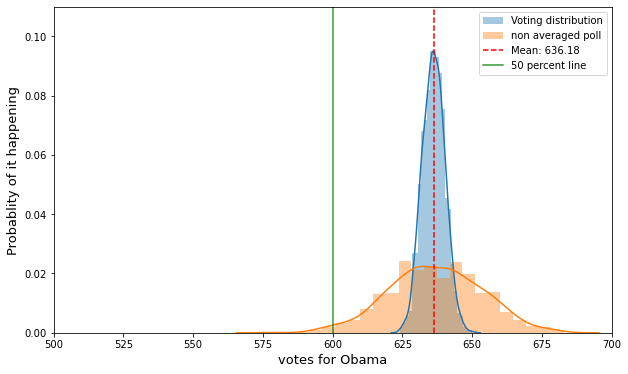

In [105]:
#Q6
plt.figure(figsize=(10,6))
plt.xlim(500,700)
plt.ylim(0,0.11)
sns.distplot(polls1k, label="Voting distribution")
sns.distplot(np.array(simP)*1200, label="non averaged poll")
plt.axvline(np.mean(polls1k), color="r", label=f"Mean: {np.mean(polls1k):.2f}", linestyle="dashed")
plt.axvline(N*0.5, label="50 percent line", color="g", alpha=0.8)
plt.xlabel("votes for Obama", fontsize=13)
plt.ylabel("Probablity of it happening", fontsize=13)
plt.legend();


In [93]:
#Q8
np.std(polls1k), np.std(np.array(simP)*1200)


(3.9913499698369526, 16.547243395804635)